### Data Exploration 

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

##### Loading all the files and checking the number of rows and columns 

In [2]:
train = pd.read_csv("Train.csv")
test = pd.read_csv("Test.csv")
health_camp = pd.read_csv("Health_Camp_Detail.csv")
patient = pd.read_csv("Patient_Profile.csv")
first_format_camp = pd.read_csv("First_Health_Camp_Attended.csv")
second_format_camp = pd.read_csv("Second_Health_Camp_Attended.csv")
third_format_camp = pd.read_csv("Third_Health_Camp_Attended.csv")
print "Rows and Columns in Train : ", train.shape
print "Rows and Columns in Test : ", test.shape
print "Rows and Columns in Health Camp Details : ", health_camp.shape
print "Rows and Columns in Patient Profile : ", patient.shape
print "Rows and Columns in First Format Health Camp Attended : ", first_format_camp.shape
print "Rows and Columns in Second Format Health Camp Attended : ", second_format_camp.shape
print "Rows and Columns in Third Format Health Camp Attended : ", third_format_camp.shape

Rows and Columns in Train :  (75278, 8)
Rows and Columns in Test :  (35249, 8)
Rows and Columns in Health Camp Details :  (65, 6)
Rows and Columns in Patient Profile :  (37633, 11)
Rows and Columns in First Format Health Camp Attended :  (6218, 5)
Rows and Columns in Second Format Health Camp Attended :  (7819, 3)
Rows and Columns in Third Format Health Camp Attended :  (6515, 4)


##### Train data exploration

In [3]:
# Names of the columns present in the train data
list(train.columns)

['Patient_ID',
 'Health_Camp_ID',
 'Registration_Date',
 'Var1',
 'Var2',
 'Var3',
 'Var4',
 'Var5']

In [4]:
# Let us take a look at the top few rows
train.head()

,Patient_ID,Health_Camp_ID,Registration_Date,Var1,Var2,Var3,Var4,Var5
0,489652,6578,10-Sep-05,4,0,0,0,2
1,507246,6578,18-Aug-05,45,5,0,0,7
2,523729,6534,29-Apr-06,0,0,0,0,0
3,524931,6535,07-Feb-04,0,0,0,0,0
4,521364,6529,28-Feb-06,15,1,0,0,7


In [5]:
# Number of unique persons present in the train
print "Number of unique persons in the train : ", len(train.Patient_ID.unique())

Number of unique persons in the train :  29828


So 29,828 unique patients are present in the 75,278 rows of the training set. Now let us see how they are distributed.

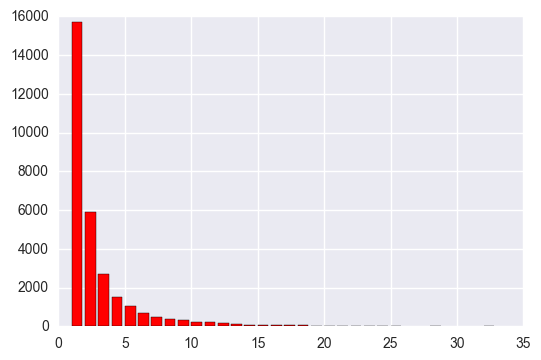

,Number_of_entries_per_person,Count
0,1,15714
1,2,5878
2,3,2675
3,4,1527
4,5,1038
5,6,670
6,7,490
7,8,388
8,9,335
9,10,207


In [6]:
grouped_df = train.groupby('Patient_ID').agg('size').reset_index()
grouped_df.columns = ["Patient_ID", "Number_of_entries_per_person"]
grouped_df = grouped_df.groupby('Number_of_entries_per_person').agg('size').reset_index()
grouped_df.columns = ["Number_of_entries_per_person", "Count"]
plt.bar(grouped_df.Number_of_entries_per_person, grouped_df.Count, color='r')
plt.show()
grouped_df

So 15,714 patients have 1 entry, 5878 have 2 entries and so on.

Now let us look at the number of health camps in train data and their distribution

In [7]:
print "Number of Health Camp ID in the train dataset : ", len(train.Health_Camp_ID.unique())

Number of Health Camp ID in the train dataset :  44


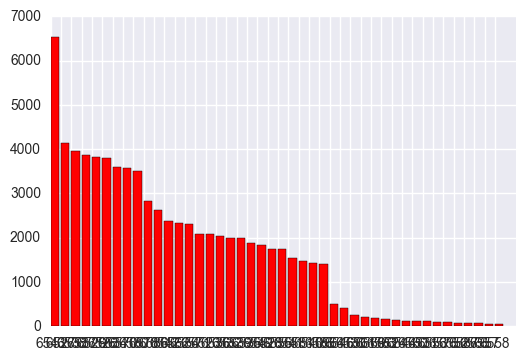

,Health_Camp_ID,Count
0,6543,6543
1,6527,4144
2,6538,3954
3,6537,3859
4,6529,3823
5,6526,3809
6,6534,3597
7,6570,3564
8,6580,3517
9,6578,2837


In [8]:
grouped_df = train.groupby("Health_Camp_ID").agg('size').reset_index()
grouped_df.columns = ["Health_Camp_ID", "Count"]
grouped_df = grouped_df.sort_values('Count', ascending=False).reset_index(drop=True)
plt.bar(range(len(grouped_df.Health_Camp_ID)), grouped_df.Count, tick_label=grouped_df.Health_Camp_ID, color='r')
plt.show()
grouped_df

So the number of patients per medical camp in train set ranges from 6543 for campid=6543 to 44 for campid=6558

##### Test data exploration

In [9]:
# Let us take a look at the top few rows
test.head()

,Patient_ID,Health_Camp_ID,Registration_Date,Var1,Var2,Var3,Var4,Var5
0,505701,6548,21-May-06,1,0,0,0,2
1,500633,6584,02-Jun-06,0,0,0,0,0
2,506945,6582,10-Aug-06,0,0,0,0,0
3,497447,6551,27-Aug-06,0,0,0,0,0
4,496446,6533,19-Sep-06,0,0,0,0,0


In [10]:
# Number of unique persons present in the test
print "Number of unique patients in the test : ", len(test.Patient_ID.unique())

Number of unique patients in the test :  15324


So 15,324 patients are present in the 35,249 rows present in test set. Now let us see the distribution just like train set

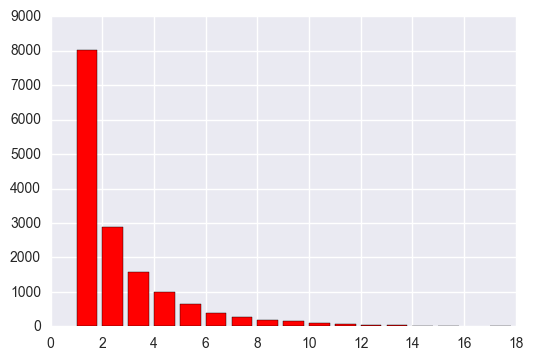

,Number_of_entries_per_person,Count
0,1,8023
1,2,2877
2,3,1570
3,4,984
4,5,640
5,6,391
6,7,272
7,8,187
8,9,163
9,10,95


In [11]:
grouped_df = test.groupby('Patient_ID').agg('size').reset_index()
grouped_df.columns = ["Patient_ID", "Number_of_entries_per_person"]
grouped_df = grouped_df.groupby('Number_of_entries_per_person').agg('size').reset_index()
grouped_df.columns = ["Number_of_entries_per_person", "Count"]
plt.bar(grouped_df.Number_of_entries_per_person, grouped_df.Count, color='r')
plt.show()
grouped_df

Now let us look at the number of health camps in test set and their distribution

In [54]:
print "Number of Health Camp ID in the test dataset : ", len(test.Health_Camp_ID.unique())

Number of Health Camp ID in the test dataset :  21


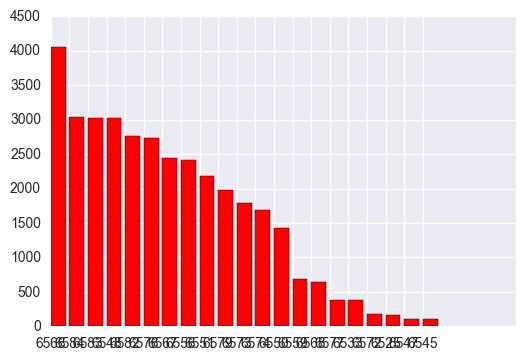

,Health_Camp_ID,Count
0,6566,4061
1,6584,3041
2,6583,3026
3,6548,3020
4,6582,2763
5,6576,2739
6,6567,2441
7,6556,2419
8,6551,2180
9,6579,1981


In [12]:
grouped_df = test.Health_Camp_ID.value_counts().reset_index()
grouped_df.columns = ["Health_Camp_ID", "Count"]
plt.bar(range(len(grouped_df.Health_Camp_ID)), grouped_df.Count, tick_label=grouped_df.Health_Camp_ID, color='r')
plt.show()
grouped_df

Now let us see what is the number of common patients and Health camps between train and test set.

In [13]:
print "Number of common patients between train and test : ",len(set(train.Patient_ID).intersection(test.Patient_ID))
print "Number of common health camps between train and test :", len(set(train.Health_Camp_ID).intersection(test.Health_Camp_ID))

Number of common patients between train and test :  8460
Number of common health camps between train and test : 0


###### Points to ponder
* 8460 patients are common between train and test. So it might be helpful to use the behaviors of these patients as features.

* There are no common health camps between train and test since the dates are disjoint. So it might be helpful to have validation sample that displays the same behavior.

##### Getting the outcome variable

We do not have an 'outcome' variable as such in the training set and we are told that (from data page)

"MedCamp runs 3 formats of these camps. The first and second format provides people with an instantaneous health score. The third format provides information about several health issues through various awareness stalls.

&

For the first 2 formats, a favourable outcome is defined as getting a health_score, while in the third format it is defined as visiting at least a stall"

So let us use this information to create a response variable and add it to the train dataset

In [14]:
## Get only the necessary columns and rename them for concatenating ##
col_names = [['Patient_ID','Health_Camp_ID','Outcome']]
first_camp = first_format_camp[['Patient_ID','Health_Camp_ID','Health_Score']]
first_camp.columns = col_names
second_camp = second_format_camp[['Patient_ID','Health_Camp_ID','Health Score']]
second_camp.columns = col_names
third_camp = third_format_camp[['Patient_ID','Health_Camp_ID','Number_of_stall_visited']]
third_camp = third_camp[third_camp['Number_of_stall_visited']>0]
third_camp.columns = col_names

## concat all the three camps ##
all_camps = pd.concat([first_camp, second_camp, third_camp])
all_camps['Outcome'] = 1
print "Number of favourable outcomes from all camps : ", all_camps.shape[0]

train = pd.read_csv("Train.csv")
print train.shape

## merging with train and create a new variable 'outcome' which can be used as
train = train.merge(all_camps, on=['Patient_ID','Health_Camp_ID'], how='left')
train['Outcome'] = train['Outcome'].fillna(0).astype('int')
train.head()

Number of favourable outcomes from all camps :  20534
(75278, 8)


,Patient_ID,Health_Camp_ID,Registration_Date,Var1,Var2,Var3,Var4,Var5,Outcome
0,489652,6578,10-Sep-05,4,0,0,0,2,1
1,507246,6578,18-Aug-05,45,5,0,0,7,0
2,523729,6534,29-Apr-06,0,0,0,0,0,1
3,524931,6535,07-Feb-04,0,0,0,0,0,0
4,521364,6529,28-Feb-06,15,1,0,0,7,1
